In [4]:
import os, shutil

original_dataset_dir = 'datasets/dogs-vs-cats/train'

base_dir = 'datasets/dogs-vs-cats-small'
os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)


In [7]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [8]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
print('훈련용 고양이 이미지 전체 개수 : ', len(os.listdir(train_cats_dir)))

print('훈련용 강아지 이미지 전체 개수 : ', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수 : ', len(os.listdir(validation_cats_dir)))

print('검증용 강아지 이미지 전체 개수 : ', len(os.listdir(validation_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수 : ', len(os.listdir(test_cats_dir)))

print('테스트용 강아지 이미지 전체 개수 : ', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 :  1000
훈련용 강아지 이미지 전체 개수 :  1000
검증용 고양이 이미지 전체 개수 :  500
검증용 강아지 이미지 전체 개수 :  500
테스트용 고양이 이미지 전체 개수 :  500
테스트용 강아지 이미지 전체 개수 :  500


In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.
W0916 10:27:43.761213 49396 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:67: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 10:27:43.812380 49396 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:548: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 10:27:43.819362 49396 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:4439: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 10:27:43.863245 49396 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:4274: The name tf.nn.max_poo

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


W0916 10:27:44.160684 49396 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0916 10:27:44.191601 49396 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:3664: The name tf.log is deprecated. Please use tf.math.log instead.

W0916 10:27:44.199636 49396 deprecation.py:323] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, #타깃 디렉터리
                                                    target_size=(150,150), #모든 이미지 150X150으로 변경
                                                    batch_size=20, #
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150),batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

W0916 10:27:45.188519 49396 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:1040: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 31s 305ms/step - loss: 0.6882 - acc: 0.5385 - val_loss: 0.6670 - val_acc: 0.6000
Epoch 2/30
100/100 [==============================] - 23s 227ms/step - loss: 0.6595 - acc: 0.6080 - val_loss: 0.6509 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 23s 230ms/step - loss: 0.6120 - acc: 0.6610 - val_loss: 0.6140 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 23s 233ms/step - loss: 0.5686 - acc: 0.7060 - val_loss: 0.6677 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 24s 236ms/step - loss: 0.5393 - acc: 0.7275 - val_loss: 0.5894 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 23s 234ms/step - loss: 0.5131 - acc: 0.7415 - val_loss: 0.5753 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 23s 230ms/step - loss: 0.4842 - acc: 0.7665 - val_loss: 0.6121 - val_acc: 0.6650
Epoch 8/30
100/100 [==============================] - 2

In [14]:
model.save('cat_and_dogs_small_1.h5')

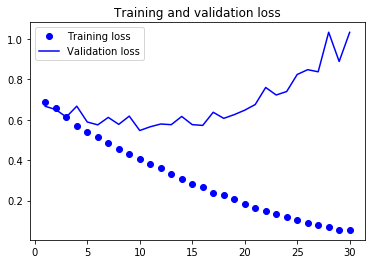

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
#데이터 증식 하는 방법
datagen = ImageDataGenerator(
        rotation_range = 20, #랜덤하게 사진을 회전시킬 각도
        width_shift_range = 0.1, # 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위(전체 너비와 높이에 대한 비율)
        height_shift_range = 0.1,
        shear_range = 0.1, #랜덤하게 사진을 확대 시킬 범위
        zoom_range = 0.1, #랜덤하게 이미지를 수평으로 뒤집음 
        horizontal_flip = True, #수평 대칭을 가정할 수 있을 때 사용
        fill_mode = 'nearest')#회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

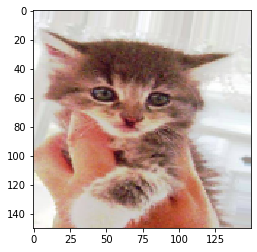

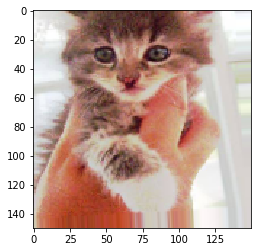

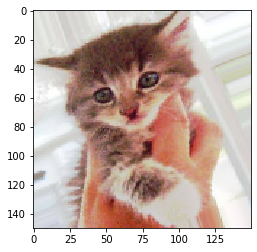

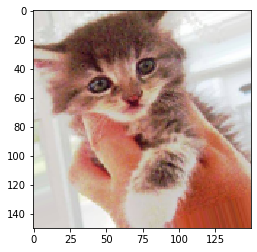

In [19]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3] #증식할 이미지를 선택 3인덱스의 사진

img = image.load_img(img_path, target_size=(150,150)) #이미지를 읽고 크기를 변경함

x = image.img_to_array(img) #(150,150,3) 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape) #(1,150,150,3) 크기로 변환

i = 0 

for batch in datagen.flow(x,batch_size=1): #datagen을 통해 x를 집어넣어 1개씩 실행하도록 함.
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 ==0:
        break
plt.show()


In [1]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])



W0917 09:53:25.051693  7188 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:67: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 09:53:25.076627  7188 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:548: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 09:53:25.081615  7188 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:4439: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 09:53:25.118117  7188 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:4274: The name tf.nn.max_pool is deprecated. Please us

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, #타깃 디렉터리
                                                    target_size=(150,150), #모든 이미지 150X150으로 변경
                                                    batch_size=20, #
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20, 
                                                        class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6949 - acc: 0.5110 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 23s 235ms/step - loss: 0.6866 - acc: 0.5290 - val_loss: 0.6933 - val_acc: 0.5110
Epoch 3/100
100/100 [==============================] - 24s 238ms/step - loss: 0.6762 - acc: 0.5620 - val_loss: 0.7143 - val_acc: 0.5110
Epoch 4/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6694 - acc: 0.5735 - val_loss: 0.6468 - val_acc: 0.6100
Epoch 5/100
100/100 [==============================] - 26s 259ms/step - loss: 0.6520 - acc: 0.6050 - val_loss: 0.6327 - val_acc: 0.6260
Epoch 6/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6414 - acc: 0.6145 - val_loss: 0.6213 - val_acc: 0.6470
Epoch 7/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6286 - acc: 0.6365 -

In [13]:
model.save('cats_and_dogs_small_2.h5')

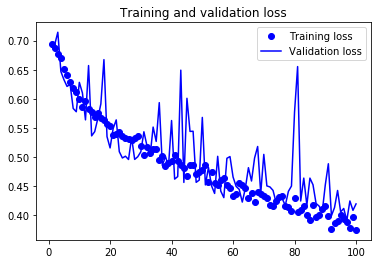

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

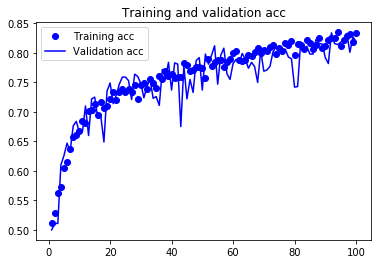

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.show()